In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df=df.dropna(how='any',axis=1)
df.columns=['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


**Note:No Nan values** in the dataset

In [5]:
# mapping values for label
df['label']=df['label'].map({'ham':0,'spam':1})

In [6]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


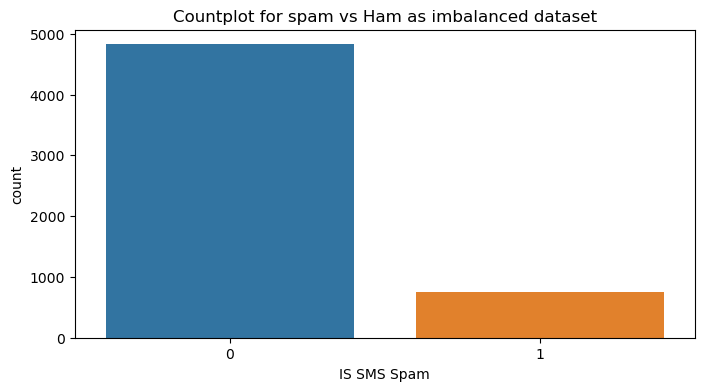

In [7]:
# countplot for spam vs ham as imbalanced dataset
plt.figure(figsize=(8,4))
g=sns.countplot(df['label'])
p=plt.title('Countplot for spam vs Ham as imbalanced dataset')
p=plt.xlabel('IS SMS Spam')
p=plt.ylabel('count')

**Insight:** From the above countplot,it is evident that the **dataset imbalanced**           
<!--  -->              
# Feature Engineering          
<!--  -->         
* Handling imbalanced dataset using OVersampling              
* Creating new feature e.g word_count,contains_currency_symbol,contain_numbers,etc

In [8]:
# Handling imbalanced dataset using oversampling
only_spam=df[df['label']==1]
print('Number of spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))


Number of spam records: 747
Number of Ham records: 4825


In [9]:
count=int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0,count-1):
    df=pd.concat([df,only_spam])
df.shape

(9307, 2)

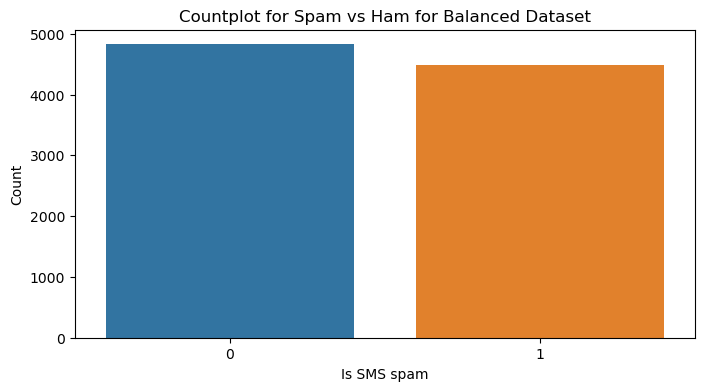

In [10]:
# countplot for spam vs ham as balanced dataset
plt.figure(figsize=(8,4))
g=sns.countplot(df['label'])
p=plt.title('Countplot for Spam vs Ham for Balanced Dataset')
p=plt.xlabel('Is SMS spam')
p=plt.ylabel('Count')

In [11]:
# creating new feature word_count
df['word_count']=df['message'].apply(lambda x: len(x.split()))
df.head(3)

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28


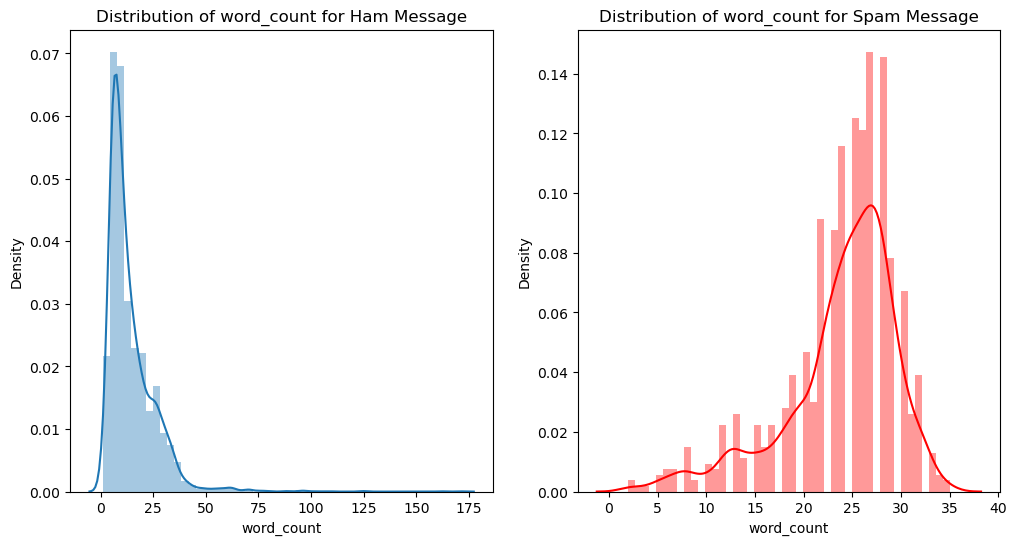

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df[df['label']==0].word_count)
plt.title('Distribution of word_count for Ham Message')

plt.subplot(1,2,2)
sns.distplot(df[df['label']==1].word_count,color='red')
plt.title('Distribution of word_count for Spam Message')

plt.show()
plt.show()

**insight:Spam message** wordcount fall in the range of **15-30 word**,wheres majority of the **Ham message** fall in the range of **below 25 words**

In [13]:
# creating feature contain_currency_symbol
def currency(x):
    currency_symbol=['€', '$', '¥', '£', '₹']
    for i in currency_symbol:
        if i in x:
            return 1
    return 0
df['currency_symbol']=df['message'].apply(currency)

In [14]:
df.head(3)

,label,message,word_count,currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0


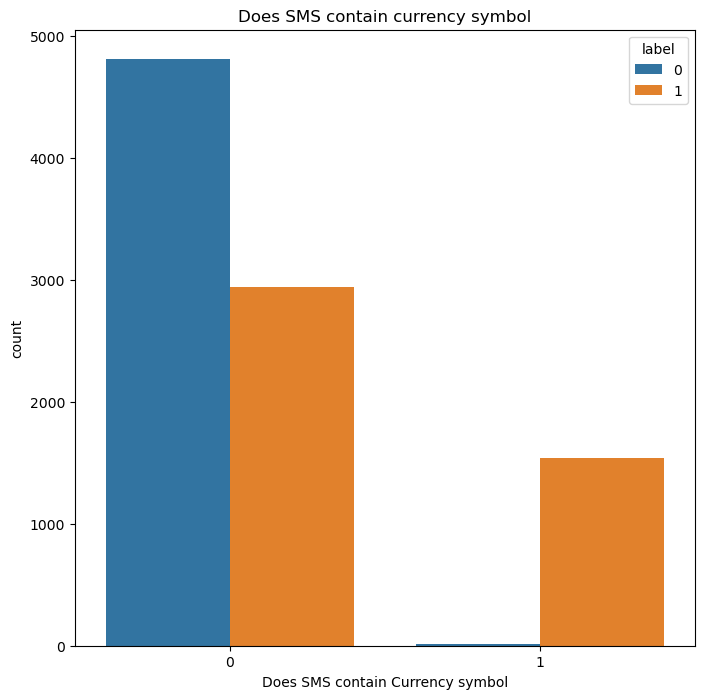

In [15]:
# countplot for contain_surrency_symbol
plt.figure(figsize=(8,8))
sns.countplot(x='currency_symbol',data=df,hue='label')
plt.title('Does SMS contain currency symbol')
plt.xlabel('Does SMS contain Currency symbol')
plt.ylabel('count')
plt.show()

**Insight:Alomsot 1/3 of spam message contain currency symbol**, and currency symbol are **rarely used in Ham message**

In [16]:
# creating feature contain_number
def numbers(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0
df['contain_number']=df['message'].apply(numbers)

In [17]:
df.head(3)

,label,message,word_count,currency_symbol,contain_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1


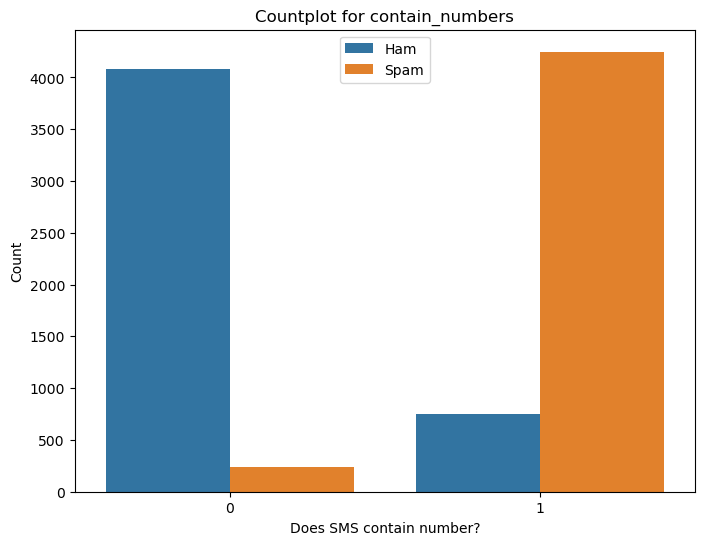

In [18]:
# Countplot for contains_number
plt.figure(figsize=(8,6))
g = sns.countplot(x='contain_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

**insight:** it is evident that **most of the Spam message contain numbers**, and **majority of the Ham message donot contain  numbers**            
<!--  -->           
<!--  -->        
# Data Cleaning        
<!--  -->      
* Removing special character and number using regular expression      
* Converting the entire sms into lower case        
* Tokenizing the sms by word         
* Removing the stop words         
* Lemmatizing the words         
* Joining the Lemmatizing words        
* Building a corpus of message

In [19]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
import nltk 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [21]:
# cleaning the message 
corpus=[]
wnl=WordNetLemmatizer()

for sms_string in list(df.message):
    
    # cleaning special character from the sms
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sms_string)
    
    # converting the entire sms into lower
    message=message.lower()
    
    #Tokenizing the sms by words
    words=message.split()
    
    # Removing the stop words
    filtered_words=[word for word in words if word not in set(stopwords.words('english'))]
    
    # Lemmatizing the words
    lemmatized_words=[wnl.lemmatize(word) for word in filtered_words]
    
    # joining the Lemmatized words
    message=' '.join(lemmatized_words)
    
    # Building a xorpus of message
    corpus.append(message)

In [22]:
corpus[:4]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say']

In [23]:
# Creating Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=500)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

# Extracting independent and dependent variables form the dataset
X=pd.DataFrame(vectors,columns=feature_names)
y=df['label']

# Model Building & Evaluation           
<!--  -->          
**Metrics:F1-score**          
<!--  -->          
* Multinomial Naive Bayes:0.943      
* Decision Tree:0.98         
* Random Forest(Ensemble):0.994      
* Voting(Multinomial Naive Bayes + Decision Tree) :0.98

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# fitting the Naive Bayes to the Training sset
from sklearn.naive_bayes import MultinomialNB     
mb=MultinomialNB()
cv=cross_val_score(mb,X_train,y_train,cv=10)
print('-----Average F1-Score for MNB model-----: {}'.format(round(cv.mean(),3)))
print('Standard Deviation : {}'.format(round(cv.std(),3)))

-----Average F1-Score for MNB model-----: 0.944
Standard Deviation : 0.013


In [26]:
# classification report form MNB model
mb.fit(X_train,y_train)
pred_mn=mb.predict(X_test)

print("-------  classification Report for MB   ----------")
print(classification_report(pred_mn,y_test))

-------  classification Report for MB   ----------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       965
           1       0.94      0.94      0.94       897

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



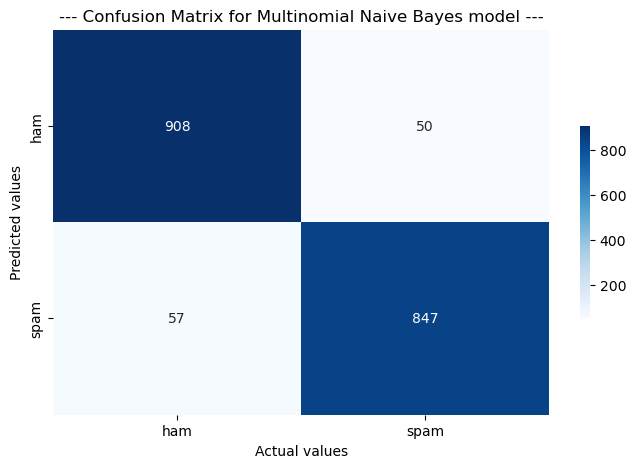

In [27]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, pred_mn)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Multinomial Naive Bayes model ---')

In [28]:
# Fitting Random Forest to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Decision Tree model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Decision Tree model: 0.98 ---
Standard Deviation: 0.004


In [29]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('--- Classification report for Decision Tree model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Decision Tree model ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       958
           1       0.97      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



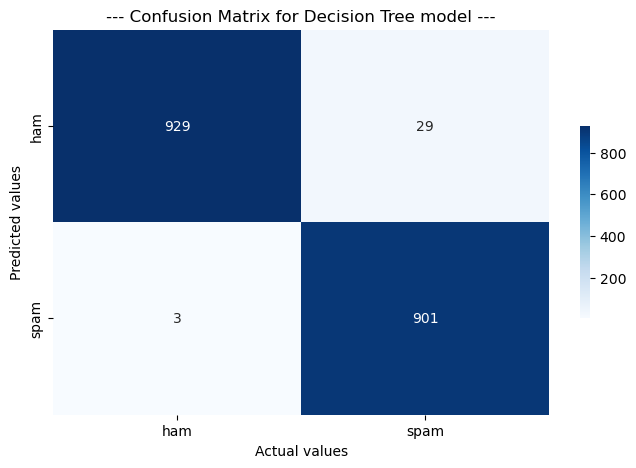

In [30]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Decision Tree model ---')

In [31]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('--- Average F1-Score for Random Forest model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for Random Forest model: 0.995 ---
Standard Deviation: 0.002


In [32]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('--- Classification report for Random Forest model ---')
print(classification_report(y_test, y_pred))

--- Classification report for Random Forest model ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       958
           1       1.00      1.00      1.00       904

    accuracy                           1.00      1862
   macro avg       1.00      1.00      1.00      1862
weighted avg       1.00      1.00      1.00      1862



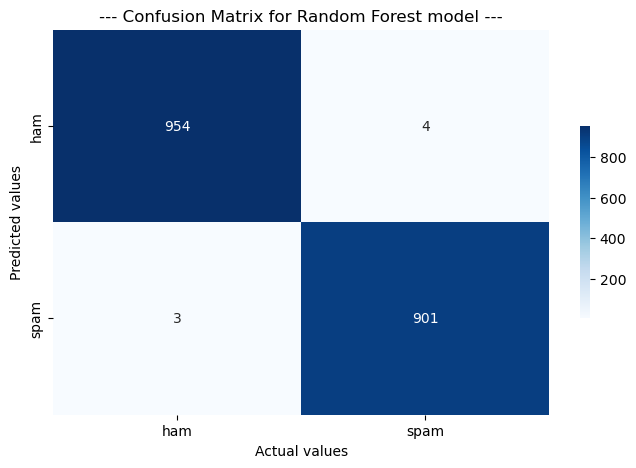

In [33]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for Random Forest model ---')

**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!

In [34]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('--- Average F1-Score for VotingClassifier model: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average F1-Score for VotingClassifier model: 0.98 ---
Standard Deviation: 0.003


**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm** is selected for predicting the results of this problem statement.

# Make Predictions

In [35]:
def predict_spam(sample_message):
    sample_message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_message)
    sample_message=sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    final_message = [wnl.lemmatize(word) for word in sample_message_words]
    final_message = ' '.join(final_message)

    temp = tfidf.transform([final_message]).toarray()
    return rf.predict(temp)

In [36]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a normal message.')

Gotcha! This is a SPAM message.


In [37]:
# Prediction 2 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a normal message.')

This is a normal message.
